<a href="https://colab.research.google.com/github/vasugupta9/DeepLearningProjects/blob/main/CIFAR10_Image_Classifier/Cifar10_ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [2]:
# Loading the cifar-10 dataset 
# cifar10 is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(np.min(x_train), np.max(x_train)) # to check if scaling to the range 0-1 is needed
print(np.min(y_train), np.max(y_train))

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
0 255
0 9


In [3]:
# scaling x_train and x_test values to the range 0-1
x_train_scaled = x_train/255.
x_test_scaled  = x_test/255.
# y_train, y_test values are already labelled as integers from 0 to 9 , so no preprocessing required

In [4]:
# Defining the CNN architecture using keras Sequential API (a minified version of VGGNet)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),  strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),  strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# printing model summary
model.summary()

# Compiling the model 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [6]:
# Training the model 
history = model.fit(x_train_scaled, y_train, batch_size=64, epochs=40, validation_data=(x_test_scaled, y_test), verbose=2)

Epoch 1/40
782/782 - 20s - loss: 1.4748 - accuracy: 0.5088 - val_loss: 1.0989 - val_accuracy: 0.6155
Epoch 2/40
782/782 - 4s - loss: 0.9532 - accuracy: 0.6642 - val_loss: 3.6966 - val_accuracy: 0.2994
Epoch 3/40
782/782 - 4s - loss: 0.8142 - accuracy: 0.7133 - val_loss: 1.0699 - val_accuracy: 0.6588
Epoch 4/40
782/782 - 4s - loss: 0.7352 - accuracy: 0.7435 - val_loss: 0.6923 - val_accuracy: 0.7580
Epoch 5/40
782/782 - 4s - loss: 0.6651 - accuracy: 0.7642 - val_loss: 0.6709 - val_accuracy: 0.7713
Epoch 6/40
782/782 - 4s - loss: 0.6095 - accuracy: 0.7856 - val_loss: 0.7959 - val_accuracy: 0.7364
Epoch 7/40
782/782 - 4s - loss: 0.5581 - accuracy: 0.8040 - val_loss: 0.5927 - val_accuracy: 0.7970
Epoch 8/40
782/782 - 4s - loss: 0.5189 - accuracy: 0.8168 - val_loss: 0.6359 - val_accuracy: 0.7847
Epoch 9/40
782/782 - 4s - loss: 0.4788 - accuracy: 0.8311 - val_loss: 0.5534 - val_accuracy: 0.8137
Epoch 10/40
782/782 - 4s - loss: 0.4419 - accuracy: 0.8447 - val_loss: 0.6788 - val_accuracy: 0.783

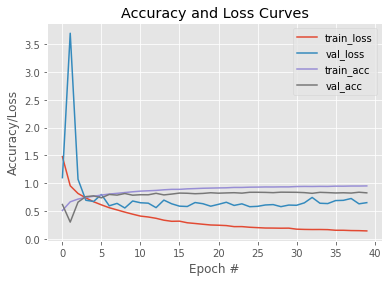

In [7]:
# plotting loss and accuracy values 
num_epochs=40
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(num_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(num_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(num_epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(num_epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy and Loss Curves")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy/Loss")
plt.legend()
plt.show()
